In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

sns.set()


In [4]:
from matplotlib.ticker import PercentFormatter
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
diabetesOrg = pd.read_csv("diabetes.csv")

In [6]:
diabetesdf = diabetesOrg.copy()
diabetesdf.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


We'll use the the dataframe to predict the outcome of diabetes where 1 represents the patient is diabetic and 0 mean the patient is not diabetes

In [7]:
diabetesdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
# Basic column stats 
diabetesdf.describe().T # make the output wide 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
# Check for duplicate columns
diabetesdf.duplicated().sum()

0

In [10]:
independent_Variables = diabetesdf.columns[:-1]
independent_Variables

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

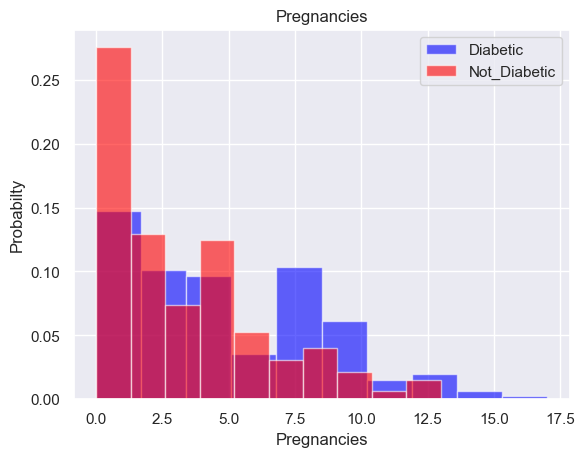

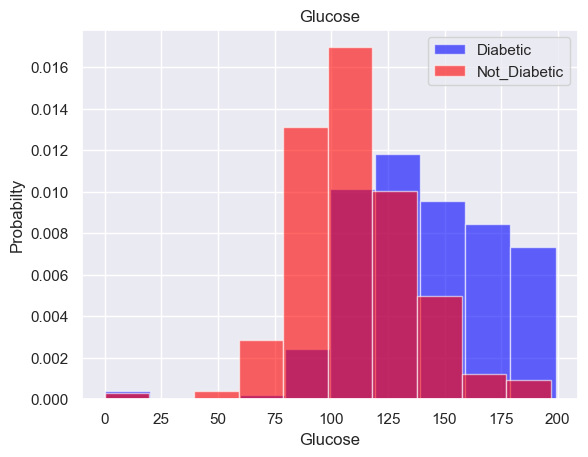

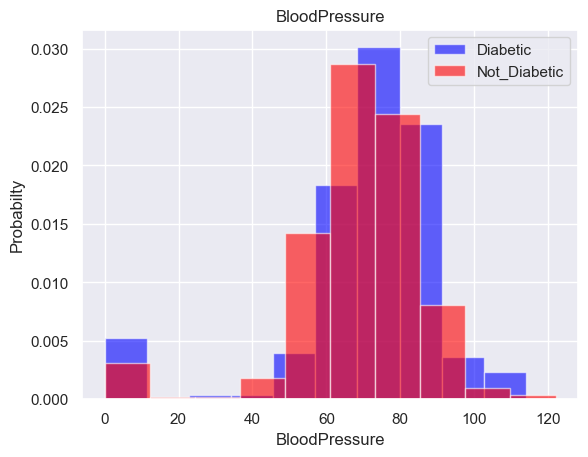

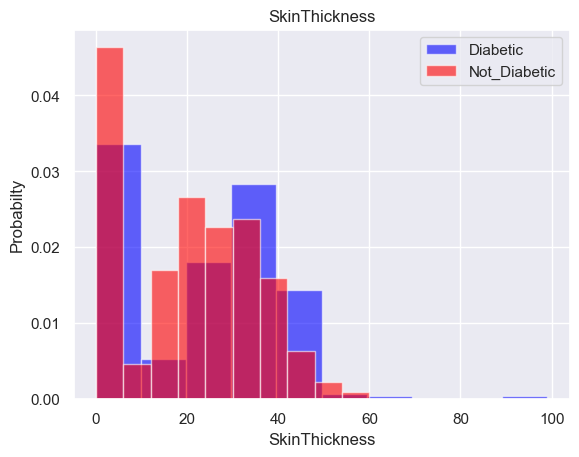

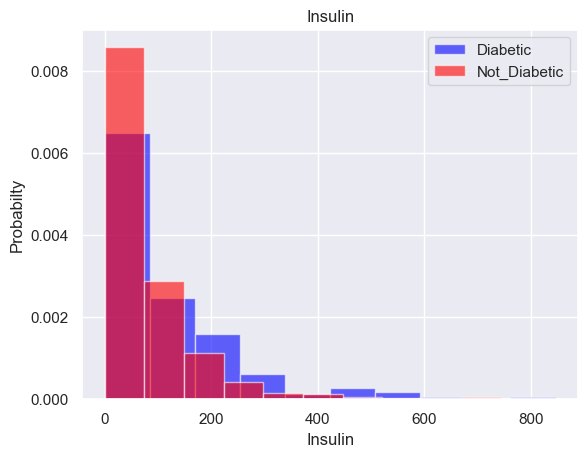

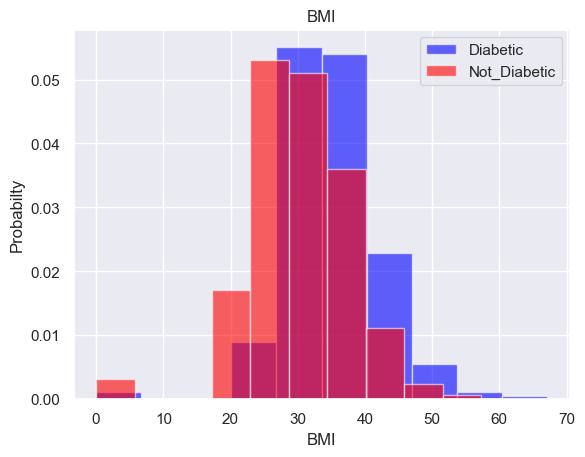

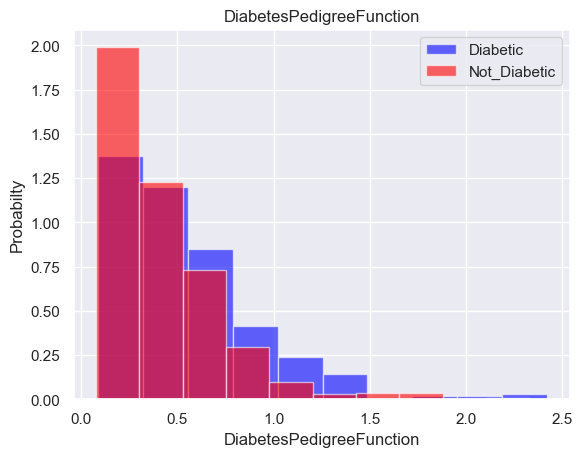

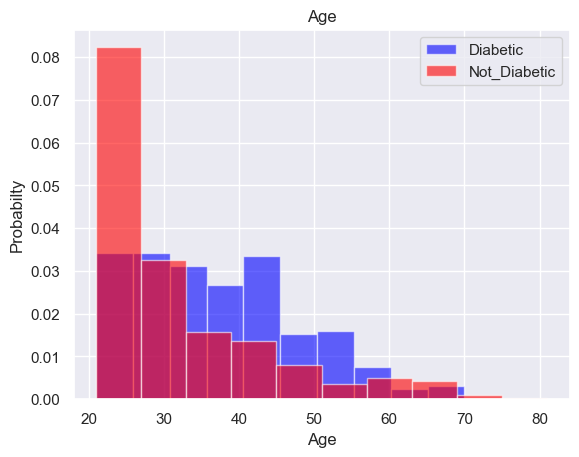

In [11]:
for label in diabetesdf.columns[:-1]:
    plt.hist(diabetesdf[diabetesdf['Outcome'] == 1][label], color = 'blue', label = 'Diabetic', alpha = 0.6, density = True)
    plt.hist(diabetesdf[diabetesdf['Outcome'] == 0][label], color = 'red', label = 'Not_Diabetic', alpha = 0.6, density = True)
    
    plt.title(label)
    plt.ylabel('Probabilty')
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

From the above plots there is very little we can infer from the relationship between the dependent and independent variable or rather we can't really tell how the feature vector fair against the target vector 

In [12]:
# Let's try onother method lets check for the correlatin
correlation_matrix = diabetesdf.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


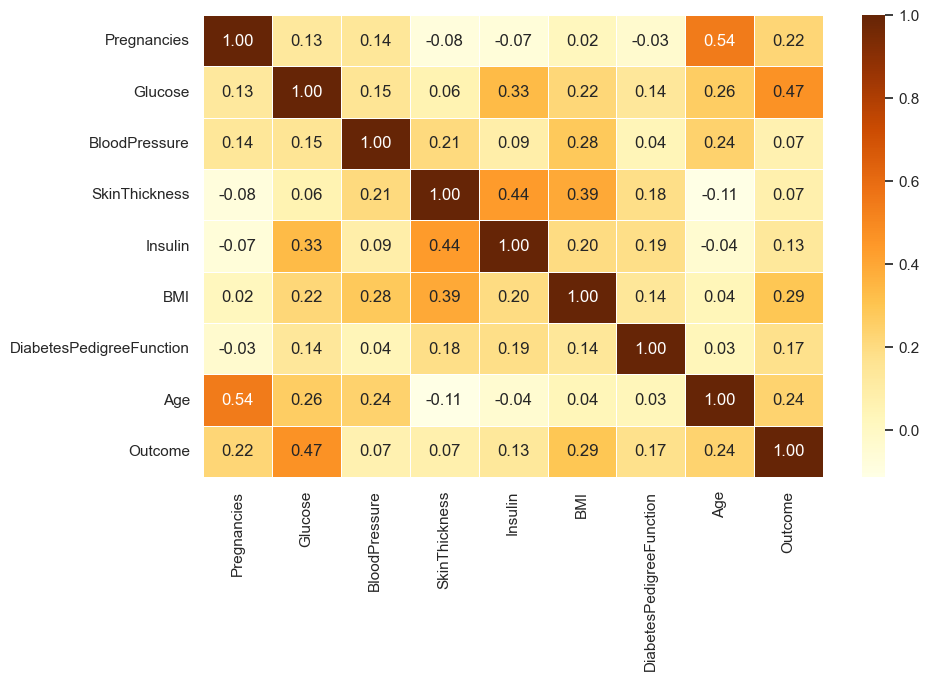

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='YlOrBr',
            fmt=".2f",
            linewidths=.5)
plt.show()

From the above heatmap we could tell, Glucose level affects the outcome, and where as Blood pressure and Skin thickness affect the Outcome the least

In [14]:
# Check the count of zero values in columns that cannot have 0 as an observation
columns_of_intrest = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = diabetesdf[columns_of_intrest].eq(0).sum()
print(zero_counts)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


From the above output we have metrics like "Glucose", "Insulin" and, "BMI" which significantly affect the target variable but have 0 value

In this regard lets replace the zero value with the mean value of the columns specifically  

In [15]:
import pandas as pd

def replace_zeros_with_mean(diabetesdf, columns_of_intrest):
    """
    Replace zero values in "'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'" columns ,
    with the corresponding mean of each column.
    
    Return:
    DataFrame with zero values replaced by the mean in specified columns
    """
    
    for col in columns_of_intrest:
        # Check if the column exists in the DataFrame
        if col in diabetesdf.columns:
            # Calculate the mean of non-zero values in the column
            col_mean = diabetesdf[col][diabetesdf[col] != 0].mean()

            # Replace zero values with the mean
            diabetesdf[col] = diabetesdf[col].replace(0, col_mean)

    return diabetesdf


# Apply the function to replace zeros with the mean in specified columns
diabetesdf = replace_zeros_with_mean(diabetesdf, columns_of_intrest)


In [16]:
# we have succesfully replaces zero values
diabetesdf.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


### Unpack a Train and Test subset of the diabetesdf 

In [17]:
train, test = np.split(diabetesdf.sample(frac = 1), [int(0.7*len(diabetesdf))])

In [18]:
print(train.shape)
print(test.shape)

(537, 9)
(231, 9)


In [19]:
# Lets check the count 1 and 0 varaible of the train dataset 
value_counts = pd.DataFrame(diabetesdf['Outcome'].value_counts())
value_counts

,count
Outcome,
0,500
1,268


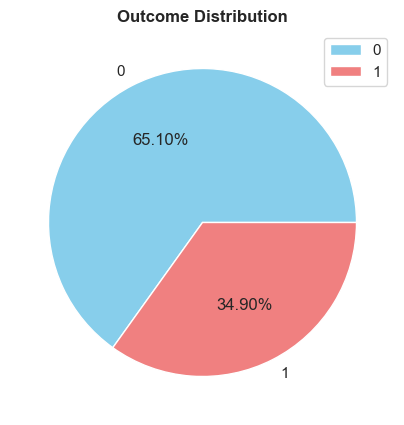

In [20]:
# Plot the outcome on a pie chart
plt.figure(figsize = ( 5, 5))
plt.pie(value_counts['count'],
       labels=value_counts.index, 
       autopct='%.2f%%', 
       colors=['skyblue', 'lightcoral'])
plt.title('Outcome Distribution', weight='bold')
plt.legend()
plt.show()

In [21]:
# Have an equivalent number of observation of the element 
def resample_dataset(dataframe, oversample = False, random_seed=None):
    X = dataframe[dataframe.columns[: -1]].values
    y = dataframe[dataframe.columns[-1]].values

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
       # return X, y

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    
    return data, X, y


In [22]:
seed_value = 42
# trian dataset
train, X_train, y_train = resample_dataset(train, oversample = True)

In [23]:
print("Dataset length:", len(train))
print("Non_diabetic:",sum(y_train == 0))
print("Diabetic:",sum(y_train == 1))



Dataset length: 728
Non_diabetic: 364
Diabetic: 364


In [24]:
# to avoid errors lets re_run the below code: 
train, test = np.split(diabetesdf.sample(frac = 1), [int(0.7*len(diabetesdf))])

In [25]:
# test data set
test, X_test, y_test = resample_dataset(train, oversample = False)

## ML Model
### K-Nearest Neighbour (kNN)


In [26]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [27]:
# y co-ordinates predicted
y_predict = knn_model.predict(X_test)

In [28]:
comparison_array =np.vstack(( y_predict, y_test))
print(comparison_array.T, end = " ")

[[1 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [1 0]
 [0 0]] 

In [44]:
cr = classification_report
print(cr(y_test, y_predict))
accuracy = round((accuracy_score(y_test, y_predict)) * 100)

print("kNN Accuracy: ", accuracy)

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       340
           1       0.61      0.81      0.70       197

    accuracy                           0.74       537
   macro avg       0.74      0.76      0.74       537
weighted avg       0.77      0.74      0.75       537

kNN Accuracy:  74


In [30]:
cm = confusion_matrix
matrix = cm(y_test, y_predict)
matrix

array([[239, 101],
       [ 38, 159]], dtype=int64)

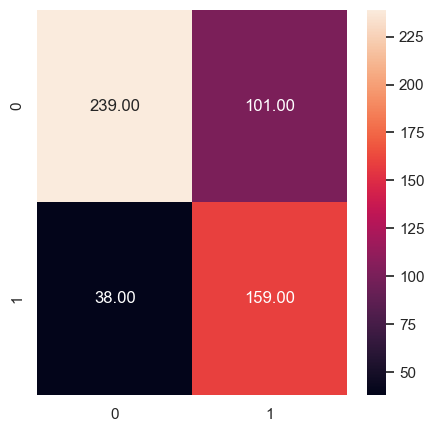

In [31]:
# Heatmap of Confusion matrix
plt.figure(figsize = ( 5, 5))
sns.heatmap(pd.DataFrame(matrix), 
            annot=True,
            fmt=".2f")
plt.show()

### See if other models will produce better results

In [32]:
# List of models.
models = [
    ('Naive Bayes', GaussianNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Machine', SVC())
]

# Create a dictionary or list to store the trained models
trained_models = {}

# Loop through the models and train them
for model_name, model_instance in models:
    model_instance.fit(X_train, y_train)
    trained_models[model_name] = model_instance


### Evaluate model performance

In [43]:
for model_name, model_instance in trained_models.items():
    # y co-ordinated predictions
    y_pred = model_instance.predict(X_test)

    # Accuracy percentage 
    accuracy = round((accuracy_score(y_test, y_pred)) * 100)
    print(f"{model_name} - Accuracy: {accuracy:.4f}")

    # Classification report
    report = classification_report(y_test, y_pred)
    print(f"{model_name} - Classification Report:\n{report}\n")


Naive Bayes - Accuracy: 76.0000
Naive Bayes - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       340
           1       0.64      0.77      0.70       197

    accuracy                           0.76       537
   macro avg       0.75      0.76      0.75       537
weighted avg       0.77      0.76      0.76       537


Logistic Regression - Accuracy: 77.0000
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       340
           1       0.67      0.75      0.70       197

    accuracy                           0.77       537
   macro avg       0.75      0.76      0.76       537
weighted avg       0.78      0.77      0.77       537


Support Vector Machine - Accuracy: 74.0000
Support Vector Machine - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77 

From the above output we can infer that logistic regression model gives up the best results with 77% percent accurracy, closely followeed by Naive Bayes model with 76% accuracy.